# Random forest models

In [20]:
from random_forest import build_random_forest, parse_first_tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler

## Data segmenation for training

In [21]:
df_new = pd.read_csv('PreparedData.csv', sep=';', index_col=0)

In [22]:
# Create new data frame without New_Credit_Card_Flag column
df_x = df_new.drop(["New_Credit_Card_Flag"], axis=1)

# Create new data frame with only New_Credit_Card_Flag column
df_y = df_new["New_Credit_Card_Flag"]

In [23]:
# Split data into random train and test subsets (Cross validation)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.2)

## Train model

In [24]:
random_forest_model = build_random_forest(x_train, y_train)

In [25]:
y_hat = random_forest_model.predict(x_test)

random_forest_acurracy = accuracy_score(y_test, y_hat)
print(f"Accuracy score random forest is {random_forest_acurracy}")

Accuracy score random forest is 0.9580846899317325


|--- feature_18 <= 56.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_19 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_19 >  0.50
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |--- feature_18 <= 43.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_18 >  43.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |--- feature_1 <= 31.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_1 >  31.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_12 >  0.50
|   |   |   |   |--- feature_2 <= 40.50
|   |   |   |   |   |--- feature_2 <= 9.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  9.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_2 >  40.50
|   |   |   |   |   |--- feature_2 <= 63.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 

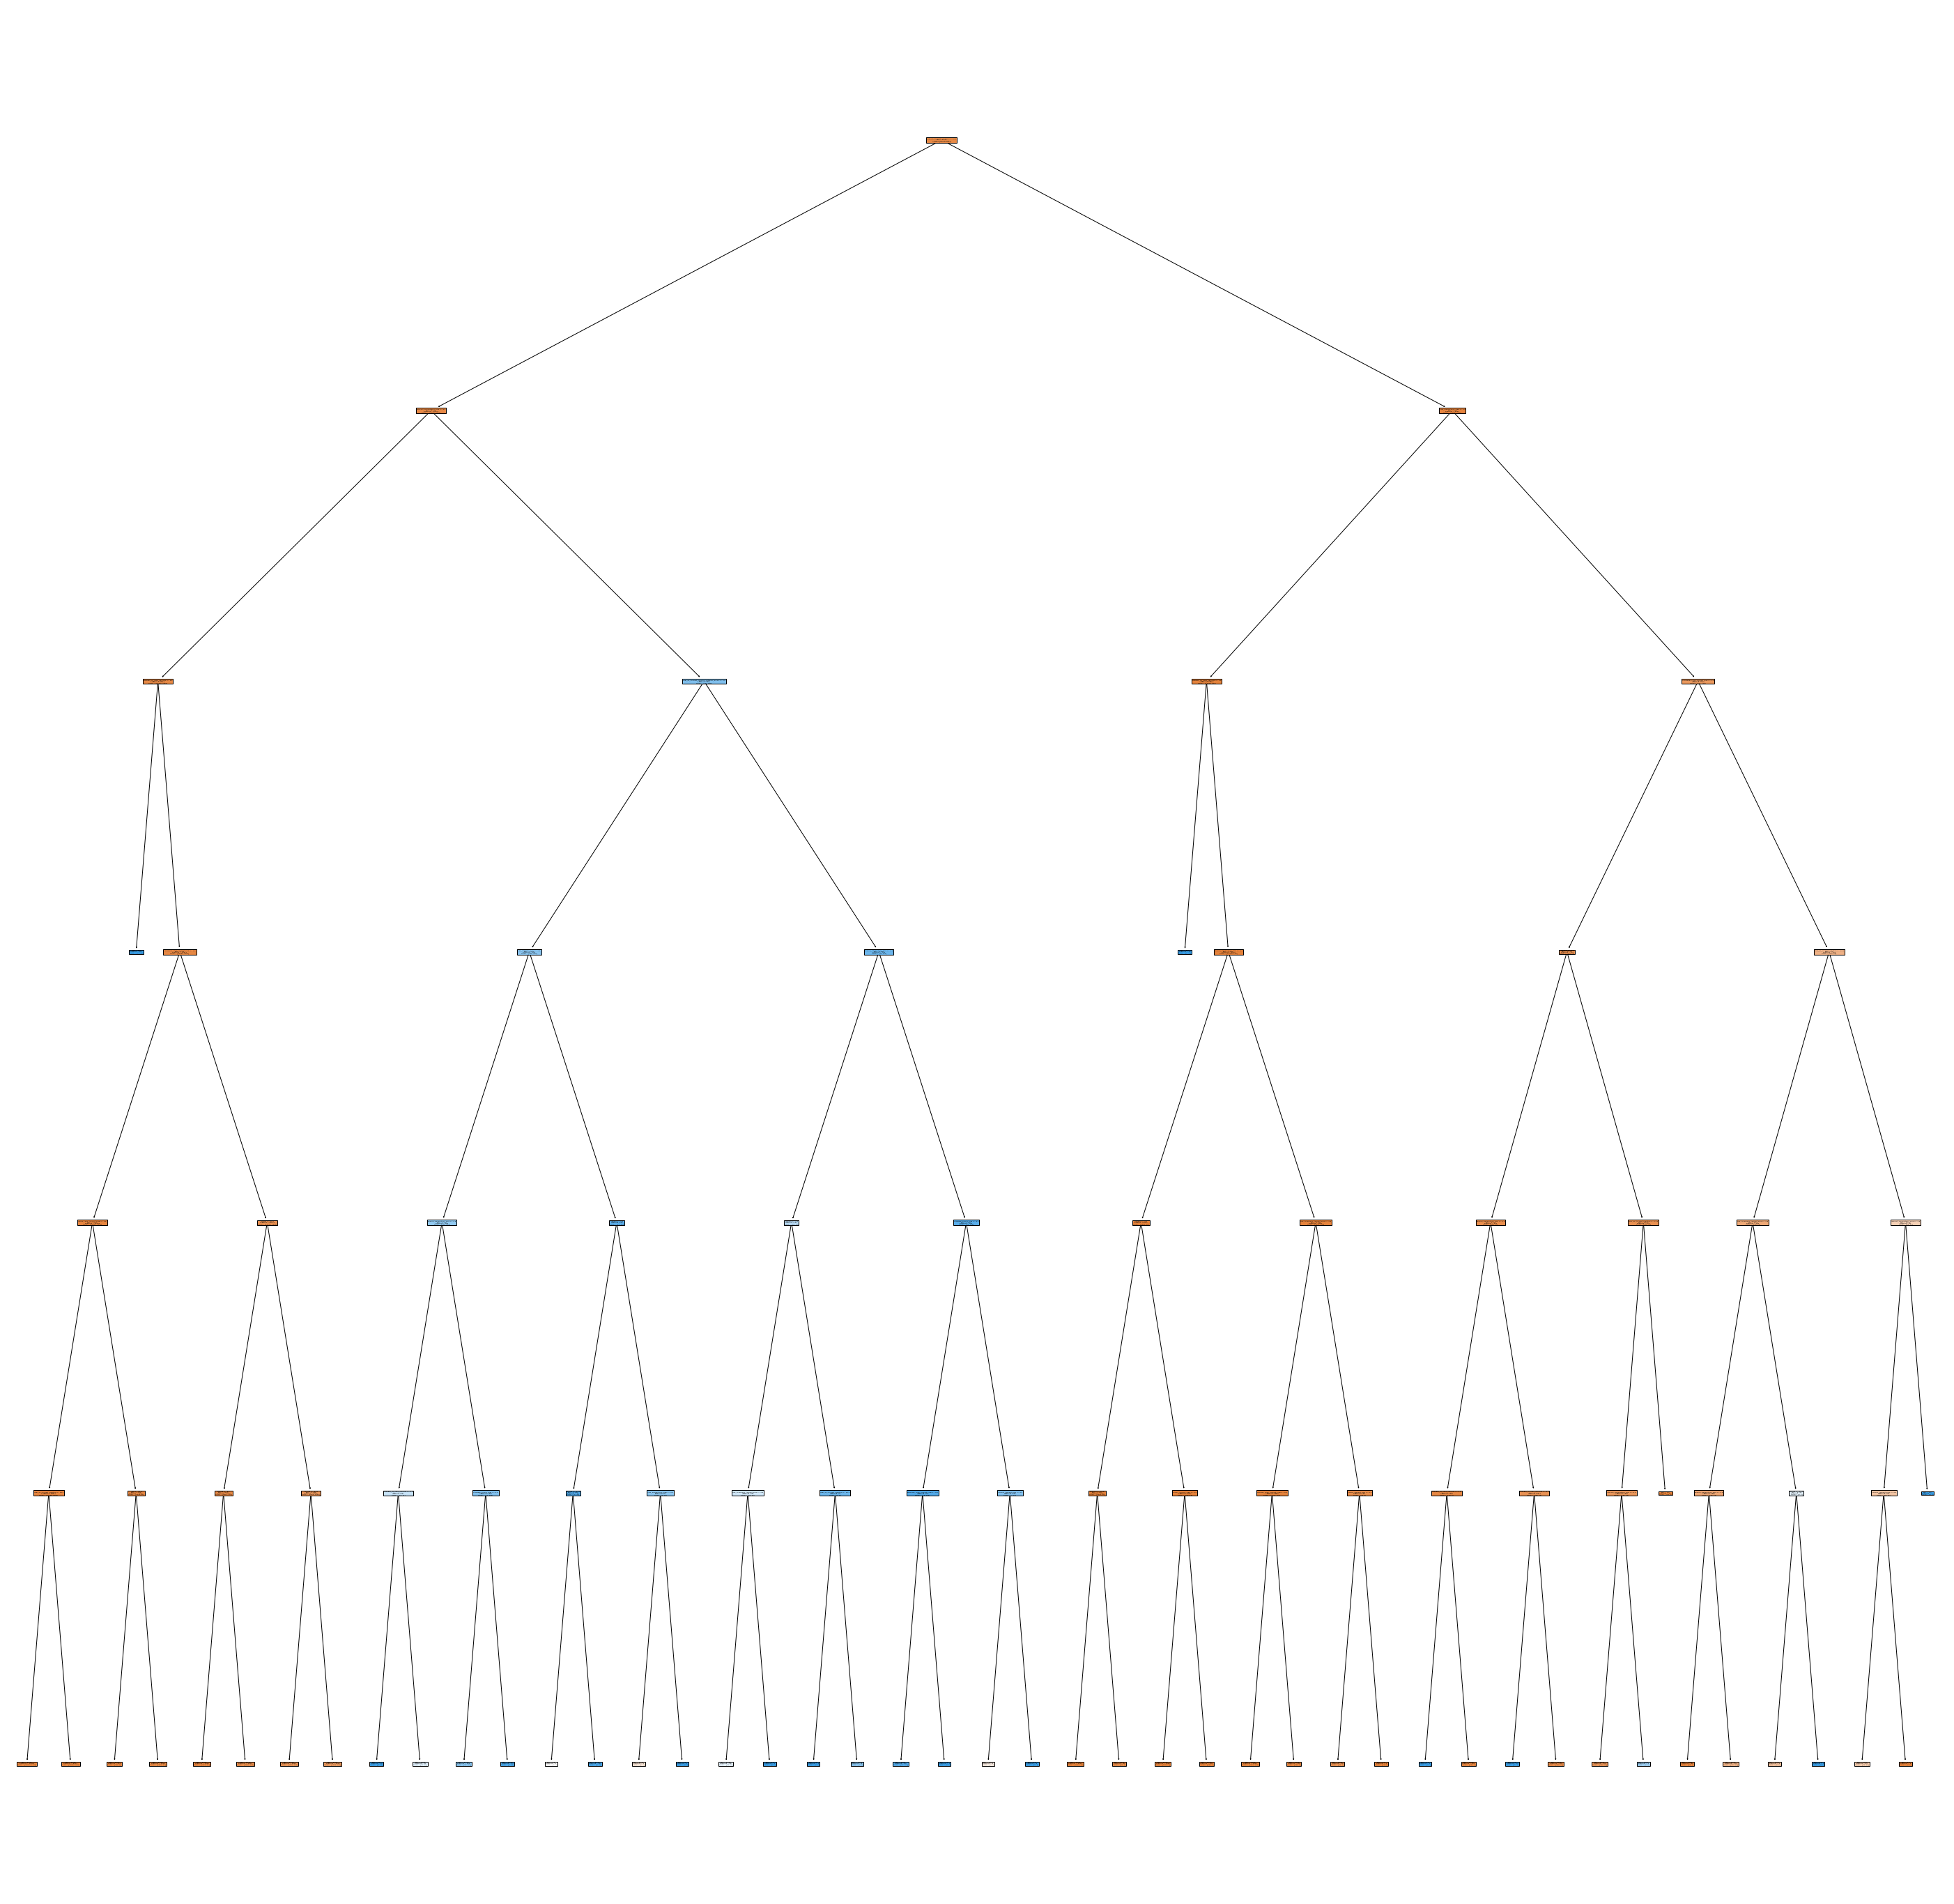

In [26]:
parse_first_tree(random_forest_model, x_train.columns)

C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


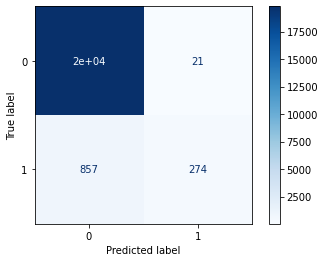

In [27]:
disp = plot_confusion_matrix(random_forest_model, x_test, y_test,                                            
                                 cmap=plt.cm.Blues)
plt.show()

## Add data using over sampler 

In [28]:
ros = RandomOverSampler(sampling_strategy = 0.5)

x_res, y_res = ros.fit_resample(df_x, df_y)

y_res.value_counts()

0    98933
1    49466
Name: New_Credit_Card_Flag, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=101)

In [30]:
random_forest_model = build_random_forest(x_train, y_train)

In [31]:
y_hat = random_forest_model.predict(x_test)

random_forest_acurracy = accuracy_score(y_test, y_hat)
print(f"Accuracy score random forest is {random_forest_acurracy}")

Accuracy score random forest is 0.8072439353099731


|--- feature_18 <= 59.50
|   |--- feature_19 <= 0.50
|   |   |--- class: 1.0
|   |--- feature_19 >  0.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |--- feature_2 <= 18.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  18.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_15 >  0.50
|   |   |   |   |   |--- feature_18 <= 22.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_18 >  22.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_17 >  0.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_8 >  0.50

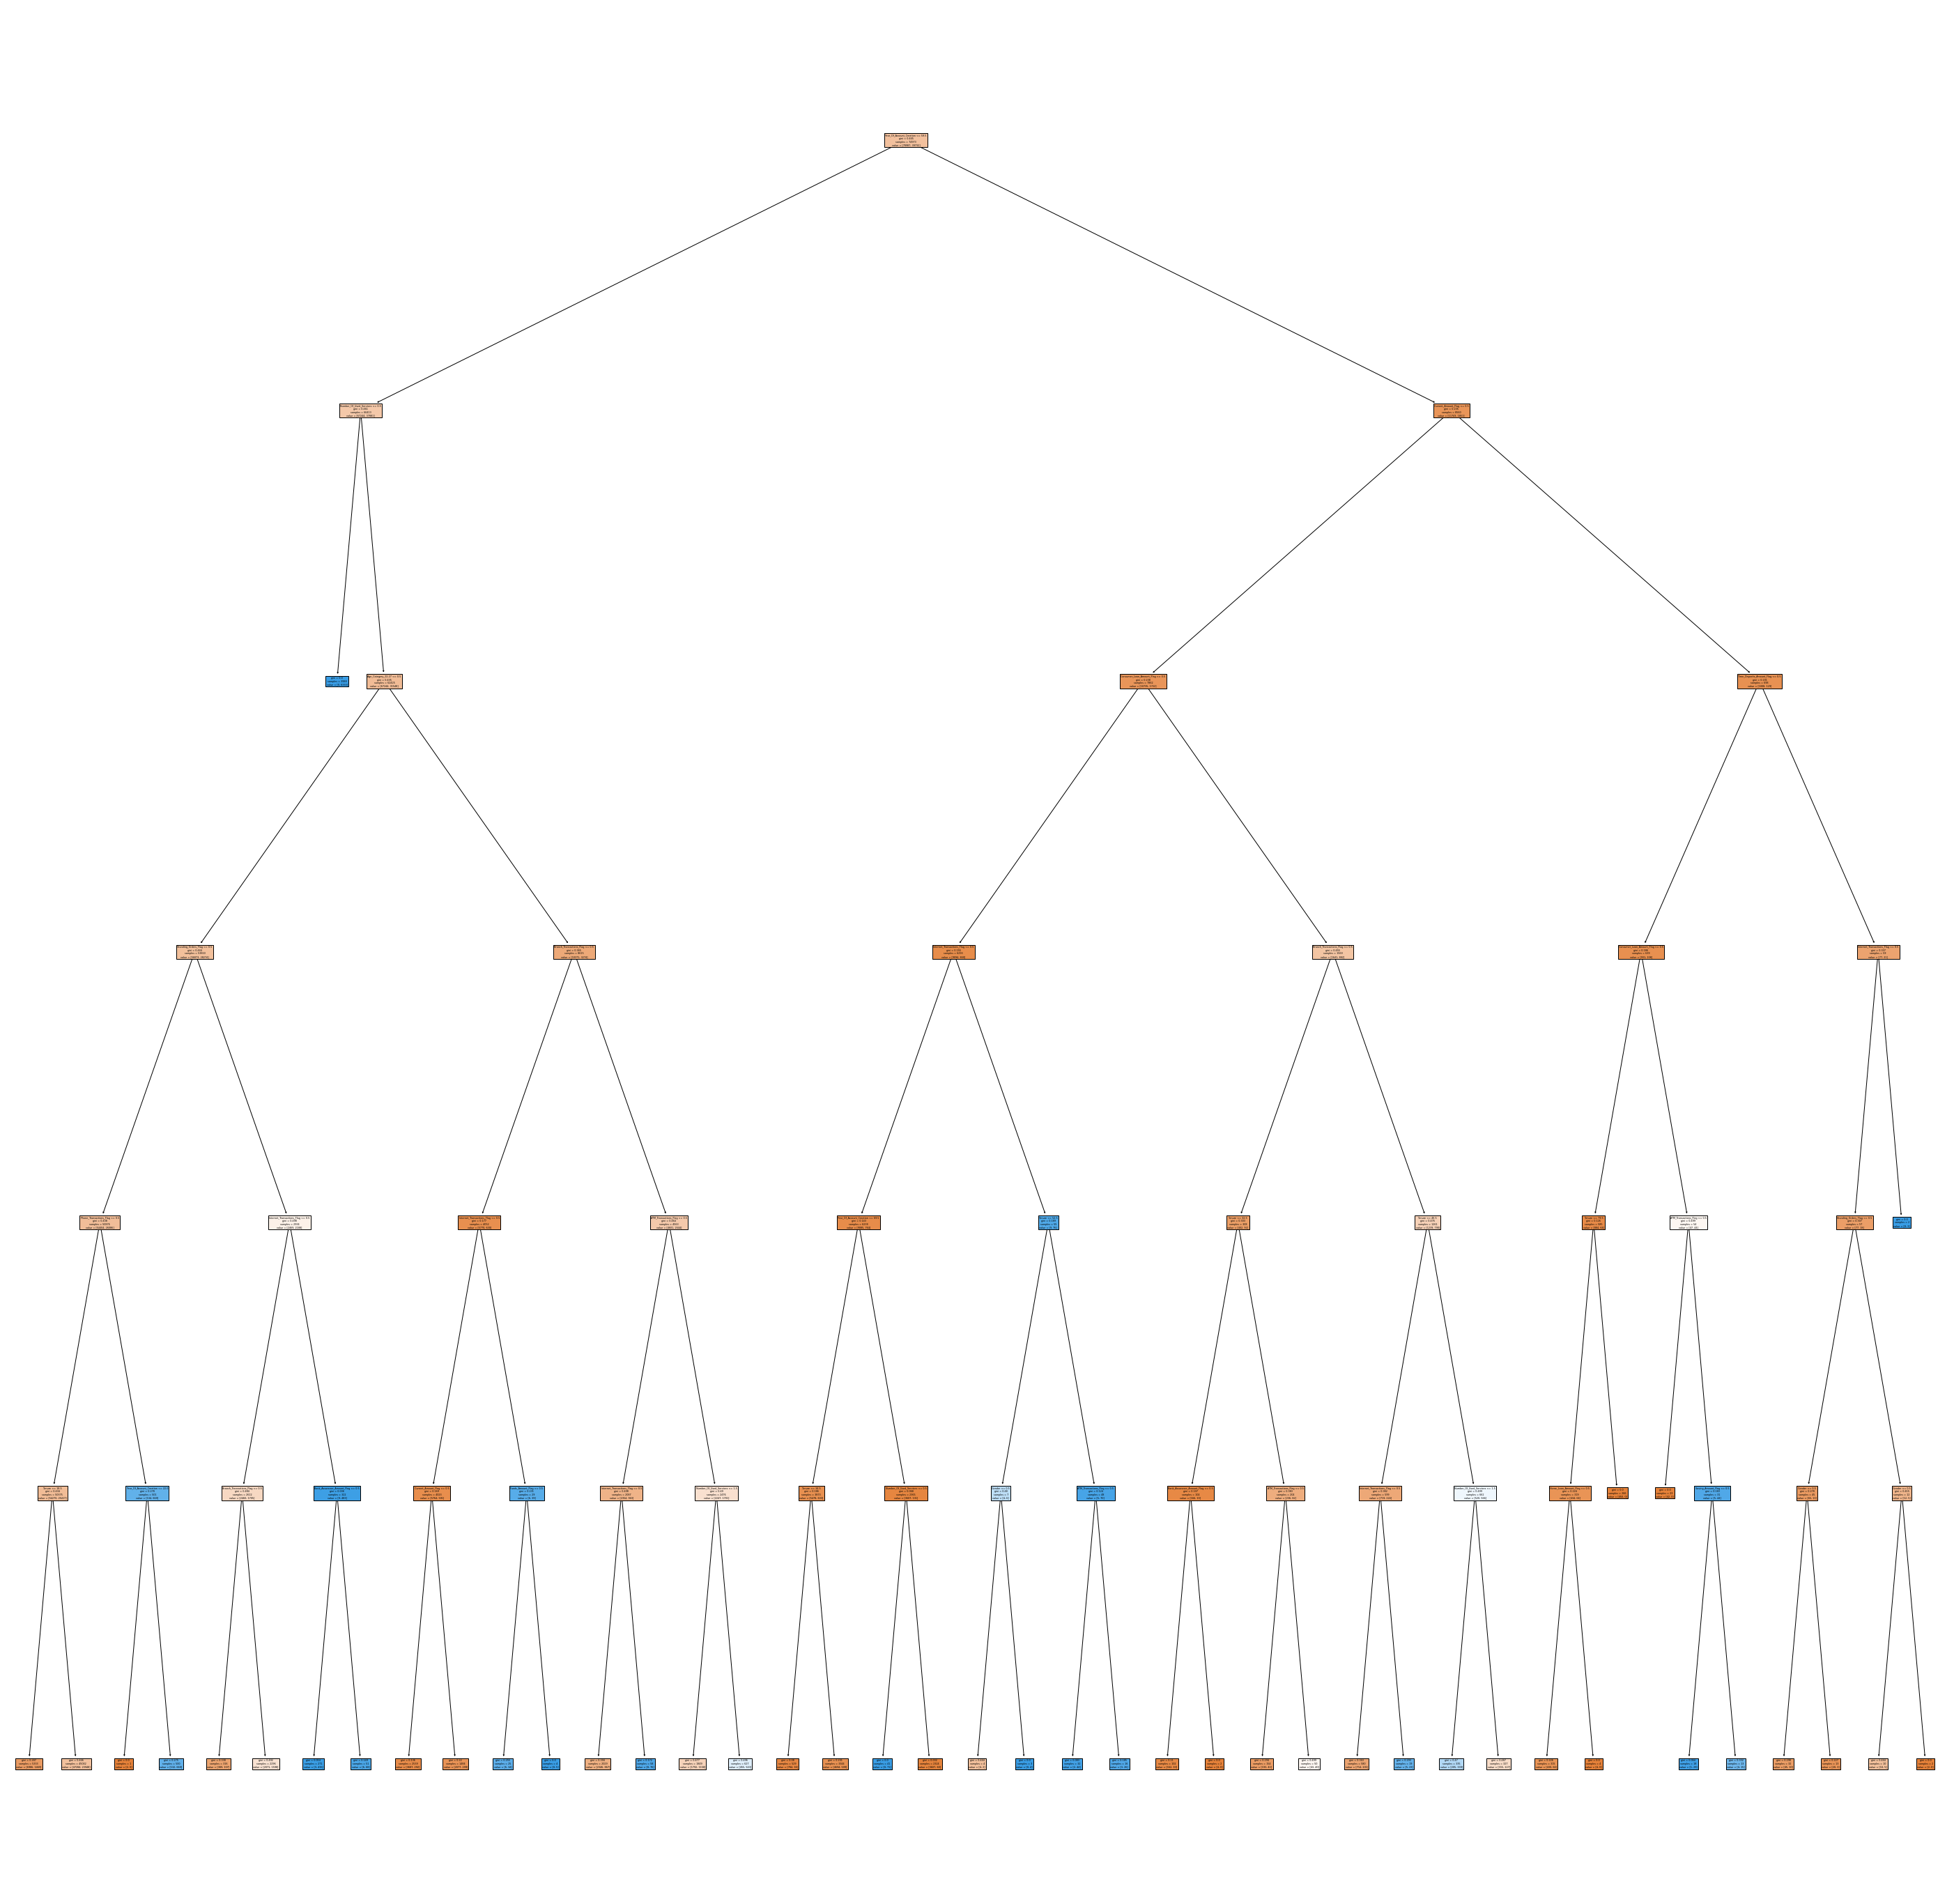

In [32]:
parse_first_tree(random_forest_model, x_train.columns)

C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


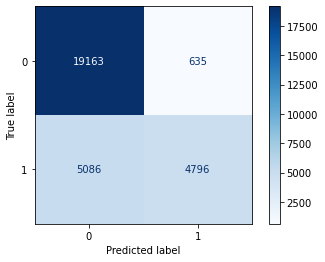

In [33]:
disp = plot_confusion_matrix(random_forest_model, x_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()